<h1>SER - Speech Emotion Recognition</h1>
<h2 style="color:red">-Nagarjuna Padala</h2>
<h2 style="color:red">-Trinadh Kumar Atmuri</h2>

<p>We are utilizing a CNN model to conduct Speech Emotion Recognition (SER) on the following datasets provided</p>
<ul>
    <li>RAVDESS - Ryerson Audio-Visual Database of Emotional Speech and Song</li>
    <li>Crema-D - Crowd-sourced Emotional Mutimodal Actors Dataset</li>
    <li>SAVEE - Surrey Audio-Visual Expressed Emotion</li>
    <li>TESS - Toronto emotional speech set</li>
<ul>

<p> We are utilizing the following libraries<p>
<ul>
    <li>os - provides operating system dependent functionality.</li>
    <li>pandas - generate summary statistics of numerical data in a DataFrame</li>
    <li>numpy - for numerical computing and array manipulation</li>
    <li>librosa - package for audio analysis</li>
    <li>seaborn - visualization library based on Matplotlib</li>
    <li>focal_loss - tool for implementing the Focal Loss function</li>
    <li>tensorflow - for machine learning and deep learning tasks</li>
    <li>warnings - manages warning messages</li>
    <li>sys - used to access to system-specific parameters</li>
    <li>matplotlib - for graph visualizations</li>
    <li>Ipython - displaying rich media representations</li>
    <li>sklearn - for data analysis and modeling</li>
    <li>keras - rapid prototyping of deep learning models</li>
</ul>

<p>Most of libraries are available with conda or python version if you face any issuses please install those modules</p>
<p>Below we are installing which are not installed by default</p>

In [60]:
!python3 -m pip install --upgrade pip

In [61]:
%pip install librosa
%pip install --upgrade tensorflow

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [62]:
%pip install seaborn
%pip install focal_loss

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


<p>Disabling warnings</p>

In [63]:
import warnings
import sys
if not sys.warnoptions:
    warnings.simplefilter("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning) 

<h2>Fetching Data</h2>

In [64]:
# All data is saved on the "DataSets" directory
import os

dataSetDirectoryPath = "DataSets/"

<h3>RAVDESS</h3>

<p>We downloaded the RAVDESS dataset from this link <a href="https://zenodo.org/records/1188976">RAVDESS dataset</a></p>
<p>We only considered the audio speech samples which consist of 24 actors with two different texts statements, two different emotional intensity, and with eight different emotions</p>
<p>Data extraction of RAVDESS as follows</p>

In [65]:
RavdessDataSetPath = dataSetDirectoryPath+ "ravdess"
RavdessDataFolders = os.listdir(RavdessDataSetPath)
print("Got the Ravdess data directory")

Got the Ravdess data directory


<h4>Data Manipulation for RAVDESS data</h4>
<p>We are creating a list to separate the file based on the emotions. Mapping the emotions with respective file path</p>
<p>For the Ravdess audio files. each file contains an emotion the emotion can be captured using the file name</p>
<p>Example: 03-01-01-01-01-01-01.wav - in this file name each number represents different parameter. here we are considering the third number which is "01" it tells the emotion of that particular audio.</p>
<p> Where each number represents as follows</p>
<ul>
    <li>01: Neutral</li>
    <li>02: Calm</li>
    <li>03: Happy</li>
    <li>04: Sad</li>
    <li>05: Anger</li>
    <li>06: Fear</li>
    <li>07: Disgust</li>
    <li>08: Surprise</li>
</ul>

In [66]:
RavdessEmotion =[]
RavdessFilePaths=[]

for eachFolder in RavdessDataFolders:
    if not eachFolder.startswith("."):
        filesInFolder = os.listdir(RavdessDataSetPath+'/'+eachFolder)
        for eachFileName in filesInFolder:
            if eachFileName.endswith(".wav"):
                splitFileName = eachFileName.split(".")
                splitNameToExtractEmotions = splitFileName[0].split("-")
                fileEmotion = int(splitNameToExtractEmotions[2])
                RavdessEmotion.append(fileEmotion)
                RavdessFilePaths.append(RavdessDataSetPath+'/'+eachFolder+"/"+eachFileName)
print("Completed the extraction of RAVDESS emotions based on the files")

Completed the extraction of RAVDESS emotions based on the files


In [67]:
# Place the extracted data in the data frames

import pandas as pd

RavdessEmotionsDataFrame = pd.DataFrame(RavdessEmotion, columns=['Emotions'])
RavdessPathDataFrame = pd.DataFrame(RavdessFilePaths, columns=['FilePath'])

RavdessDataFrame = pd.concat([RavdessEmotionsDataFrame, RavdessPathDataFrame], axis=1)

RavdessDataFrame.head()



,Emotions,FilePath
0,5,DataSets/ravdess/Actor_16/03-01-05-01-02-01-16...
1,6,DataSets/ravdess/Actor_16/03-01-06-01-02-02-16...
2,6,DataSets/ravdess/Actor_16/03-01-06-02-01-02-16...
3,5,DataSets/ravdess/Actor_16/03-01-05-02-01-01-16...
4,7,DataSets/ravdess/Actor_16/03-01-07-01-01-01-16...


In [68]:
# Replace emotion number with emotion string
mappedEmotionStrings = {1: 'neutral', 2: 'calm', 3: 'happy', 4: 'sad', 5: 'angry', 6: 'fear', 7: 'disgust', 8: 'surprise'}
RavdessDataFrame['Emotions'].replace(mappedEmotionStrings, inplace=True)
RavdessDataFrame.head()

,Emotions,FilePath
0,angry,DataSets/ravdess/Actor_16/03-01-05-01-02-01-16...
1,fear,DataSets/ravdess/Actor_16/03-01-06-01-02-02-16...
2,fear,DataSets/ravdess/Actor_16/03-01-06-02-01-02-16...
3,angry,DataSets/ravdess/Actor_16/03-01-05-02-01-01-16...
4,disgust,DataSets/ravdess/Actor_16/03-01-07-01-01-01-16...


In [69]:
print(RavdessDataFrame.Emotions.value_counts())

Emotions
angry       192
fear        192
disgust     192
sad         192
surprise    192
happy       192
calm        192
neutral      96
Name: count, dtype: int64


<h3>CREMA D</h3>

<p>We downloaded the CREMA D dataset from this link <a href="https://paperswithcode.com/dataset/crema-d">CREMA D dataset</a></p>
<p>We only considered the audio speech samples which consist of 91 actors with 12 different texts statements, four different emotional intensity, and with six different emotions</p>
<p>Data extraction of CREMA D as follows</p>

In [70]:
CremaDataSetPath = dataSetDirectoryPath+ "CREMA-D"
CremaDataFilesFolder = os.listdir(CremaDataSetPath)
print("Got the CREMA D data directory")

Got the CREMA D data directory


<h4>Data Manipulation for CREMA D data</h4>
<p>We are creating a list to separate the file based on the emotions. Mapping the emotions with respective file path</p>
<p>For the CREMA D audio files. each file contains an emotion the emotion can be captured using the file name</p>
<p>Example: 1001_DFA_ANG_XX.wav - if we see the third string, it has "ANG" it represents the emotions of the audio file.</p>
<p> Where each abbreviation of emotion represents as follows</p>
<ul>
    <li>ANG: Anger</li>
    <li>DIS: Disgust</li>
    <li>SAD: Sad</li>
    <li>FEA: Fear</li>
    <li>HAP: Happy</li>
    <li>NEU: Neutral</li>
</ul>

In [71]:
CremaDEmotion =[]
CremaDFilePaths=[]

for eachFileName in CremaDataFilesFolder:
    if eachFileName.endswith(".wav"):
        splitFileName = eachFileName.split(".")
        splitNameToExtractEmotions = splitFileName[0].split("_")
        fileEmotion = splitNameToExtractEmotions[2]
        if fileEmotion == 'ANG':
            CremaDEmotion.append('angry')
            CremaDFilePaths.append(CremaDataSetPath+'/'+eachFileName)
        elif fileEmotion == 'DIS':
            CremaDEmotion.append('disgust')
            CremaDFilePaths.append(CremaDataSetPath+'/'+eachFileName)
        elif fileEmotion == 'SAD':
            CremaDEmotion.append('sad')
            CremaDFilePaths.append(CremaDataSetPath+'/'+eachFileName)
        elif fileEmotion == 'FEA':
            CremaDEmotion.append('fear')
            CremaDFilePaths.append(CremaDataSetPath+'/'+eachFileName)
        elif fileEmotion == 'HAP':
            CremaDEmotion.append('happy')
            CremaDFilePaths.append(CremaDataSetPath+'/'+eachFileName)
        elif fileEmotion == 'NEU':
            CremaDEmotion.append('neutral')
            CremaDFilePaths.append(CremaDataSetPath+'/'+eachFileName)
print("Completed the extration of CREMA D emotions based on the files")

Completed the extration of CREMA D emotions based on the files


In [72]:
CreamDEmotionsDataFrame = pd.DataFrame(CremaDEmotion, columns=['Emotions'])
CreamDPathDataFrame = pd.DataFrame(CremaDFilePaths, columns=['FilePath'])

CreamDDataFrame = pd.concat([CreamDEmotionsDataFrame, CreamDPathDataFrame], axis=1)

CreamDDataFrame.head()

,Emotions,FilePath
0,angry,DataSets/CREMA-D/1022_ITS_ANG_XX.wav
1,angry,DataSets/CREMA-D/1037_ITS_ANG_XX.wav
2,neutral,DataSets/CREMA-D/1060_ITS_NEU_XX.wav
3,neutral,DataSets/CREMA-D/1075_ITS_NEU_XX.wav
4,disgust,DataSets/CREMA-D/1073_IOM_DIS_XX.wav


In [73]:
print(CreamDDataFrame.Emotions.value_counts())

Emotions
angry      1271
disgust    1271
sad        1271
fear       1271
happy      1271
neutral    1087
Name: count, dtype: int64


<h3>SAVEE</h3>

<p>We downloaded the SAVEE dataset from this link <a href="http://kahlan.eps.surrey.ac.uk/savee/">SAVEE dataset</a></p>
<p>We only considered the audio speech samples which consist seven different emotions</p>
<p>Data extraction of SAVEE as follows</p>

In [74]:
SaveePath = dataSetDirectoryPath+ "Savee"
SaveeDataFilesFolder = os.listdir(SaveePath)
print("Got the SAVEE data directory")

Got the SAVEE data directory


<h4>Data Manipulation for SAVEE data</h4>
<p>We are creating a list to separate the file based on the emotions. Mapping the emotions with respective file path</p>
<p>For the SAVEE audio files. each file contains an emotion the emotion can be captured using the file name</p>
<p>Example: DC_a01.wav - if we see the second s[plitted string the letter starts with "a" which means it's an anger emotion based audio</p>
<p> Where each abbreviation of emotion represents as follows</p>
<ul>
    <li>a: Anger</li>
    <li>d: Disgust</li>
    <li>sa: Sad</li>
    <li>f: Fear</li>
    <li>h: Happy</li>
    <li>n: Neutral</li>
    <li>su: Suprise</li>
</ul>

In [75]:

SaveeEmotion = []
SaveeFilePath = []

for eachFileName in SaveeDataFilesFolder:
    extractFilePath = eachFileName.split('_')[1]
    emotionVal = extractFilePath[:-6]
    if emotionVal=='d':
        SaveeFilePath.append(SaveePath+"/" + eachFileName)
        SaveeEmotion.append('disgust')
    elif emotionVal=='a':
        SaveeFilePath.append(SaveePath+"/" + eachFileName)
        SaveeEmotion.append('angry')
    elif emotionVal=='su':
        SaveeFilePath.append(SaveePath+"/" + eachFileName)
        SaveeEmotion.append('surprise')
    elif emotionVal=='h':
        SaveeFilePath.append(SaveePath+"/" + eachFileName)
        SaveeEmotion.append('happy')
    elif emotionVal=='sa':
        SaveeFilePath.append(SaveePath+"/" + eachFileName)
        SaveeEmotion.append('sad')
    elif emotionVal=='f':
        SaveeFilePath.append(SaveePath+"/" + eachFileName)
        SaveeEmotion.append('fear')
    elif emotionVal=='n':
        SaveeFilePath.append(SaveePath+"/" + eachFileName)
        SaveeEmotion.append('neutral')
print("Completed the extration of SAVEE emotions based on the files")      


Completed the extration of SAVEE emotions based on the files


In [76]:
SaveeDataFrame = pd.DataFrame(SaveeEmotion, columns=['Emotions'])
SaveePathDataFrame = pd.DataFrame(SaveeFilePath, columns=['FilePath'])

SaveeDataFrame = pd.concat([SaveeDataFrame, SaveePathDataFrame], axis=1)

SaveeDataFrame.head()

,Emotions,FilePath
0,sad,DataSets/Savee/JK_sa01.wav
1,sad,DataSets/Savee/JK_sa15.wav
2,neutral,DataSets/Savee/DC_n13.wav
3,surprise,DataSets/Savee/DC_su09.wav
4,neutral,DataSets/Savee/DC_n07.wav


In [77]:
print(SaveeDataFrame.Emotions.value_counts())

Emotions
neutral     120
sad          60
surprise     60
fear         60
disgust      60
happy        60
angry        60
Name: count, dtype: int64


<h3>TESS</h3>

<p>We downloaded the TESS dataset from this link <a href="https://tspace.library.utoronto.ca/handle/1807/24487">TESS dataset</a></p>
<p>We only considered the audio speech samples which consist of recordings of seven different emotions</p>
<p>Data extraction of TESS as follows</p>

In [78]:
TessPath = dataSetDirectoryPath+ "TESS"
TessDataFilesFolder = os.listdir(TessPath)
print("Got the TESS data directory")

Got the TESS data directory


<h4>Data Manipulation for TESS data</h4>
<p>We are creating a list to separate the file based on the emotions. Mapping the emotions with respective file path</p>
<p>For the TESS audio files. each file contains an emotion the emotion can be captured using the file name</p>
<p>Each has a specific emotion related files suppose "OAF_angry" is the folder name - the OAF represents the actor and "angry" represents the emotion</p>

In [79]:
TessEmotion = []
TessFilePath = []

for dir in TessDataFilesFolder:
    if not dir.startswith("."):
        TessDirect = os.listdir(TessPath+"/" + dir)
        for eachFilePath in TessDirect:
            splittedPartFile = eachFilePath.split('.')[0]
            splittedPartFile = splittedPartFile.split('_')[2]
            if splittedPartFile=='ps':
                TessEmotion.append('surprise')
            else:
                TessEmotion.append(splittedPartFile)
            TessFilePath.append(TessPath+"/" + dir + '/' + eachFilePath)

In [80]:
TessDataFrame = pd.DataFrame(TessEmotion, columns=['Emotions'])
TessPathDataFrame = pd.DataFrame(TessFilePath, columns=['FilePath'])

TessDataFrame = pd.concat([TessDataFrame, TessPathDataFrame], axis=1)

TessDataFrame.head()

,Emotions,FilePath
0,disgust,DataSets/TESS/YAF_disgust/YAF_date_disgust.wav
1,disgust,DataSets/TESS/YAF_disgust/YAF_rag_disgust.wav
2,disgust,DataSets/TESS/YAF_disgust/YAF_raise_disgust.wav
3,disgust,DataSets/TESS/YAF_disgust/YAF_ditch_disgust.wav
4,disgust,DataSets/TESS/YAF_disgust/YAF_door_disgust.wav


In [81]:
print(TessDataFrame.Emotions.value_counts())

Emotions
disgust     400
surprise    400
happy       400
sad         400
neutral     400
fear        400
angry       400
Name: count, dtype: int64


In [82]:
# merge both data sets
mergedDataSet = pd.concat([RavdessDataFrame, CreamDDataFrame, SaveeDataFrame, TessDataFrame], axis = 0)
mergedDataSet.to_csv("combinedData.csv",index=False)
mergedDataSet.head()

,Emotions,FilePath
0,angry,DataSets/ravdess/Actor_16/03-01-05-01-02-01-16...
1,fear,DataSets/ravdess/Actor_16/03-01-06-01-02-02-16...
2,fear,DataSets/ravdess/Actor_16/03-01-06-02-01-02-16...
3,angry,DataSets/ravdess/Actor_16/03-01-05-02-01-01-16...
4,disgust,DataSets/ravdess/Actor_16/03-01-07-01-01-01-16...


In [83]:
# Shuffling the data
mergedDataSet = mergedDataSet.sample(frac = 1)
mergedDataSet.head()

,Emotions,FilePath
175,fear,DataSets/ravdess/Actor_18/03-01-06-02-01-02-18...
279,angry,DataSets/CREMA-D/1057_DFA_ANG_XX.wav
2008,neutral,DataSets/CREMA-D/1008_TIE_NEU_XX.wav
727,fear,DataSets/CREMA-D/1037_DFA_FEA_XX.wav
7323,sad,DataSets/CREMA-D/1036_IEO_SAD_LO.wav


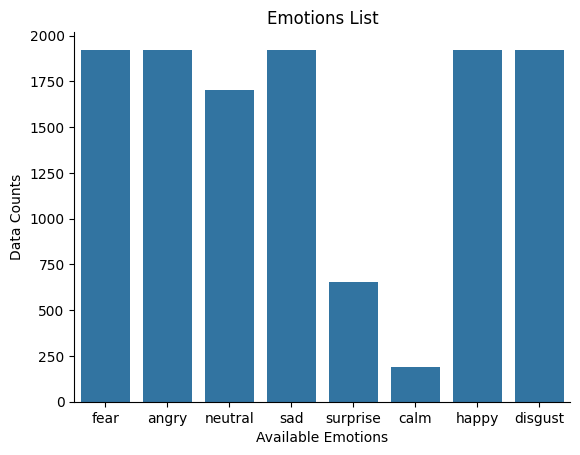

In [84]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.title('Emotions List')
sns.countplot(x=mergedDataSet["Emotions"])
plt.ylabel('Data Counts')
plt.xlabel('Available Emotions')
sns.despine()
plt.show()

In [85]:
mergedDataSet

,Emotions,FilePath
175,fear,DataSets/ravdess/Actor_18/03-01-06-02-01-02-18...
279,angry,DataSets/CREMA-D/1057_DFA_ANG_XX.wav
2008,neutral,DataSets/CREMA-D/1008_TIE_NEU_XX.wav
727,fear,DataSets/CREMA-D/1037_DFA_FEA_XX.wav
7323,sad,DataSets/CREMA-D/1036_IEO_SAD_LO.wav
...,...,...
2648,sad,DataSets/CREMA-D/1022_ITS_SAD_XX.wav
104,neutral,DataSets/Savee/JK_n18.wav
6297,neutral,DataSets/CREMA-D/1061_IWW_NEU_XX.wav
5945,happy,DataSets/CREMA-D/1059_TAI_HAP_XX.wav


Selected file emotion fear
Selected audio file DataSets/ravdess/Actor_18/03-01-06-02-01-02-18.wav


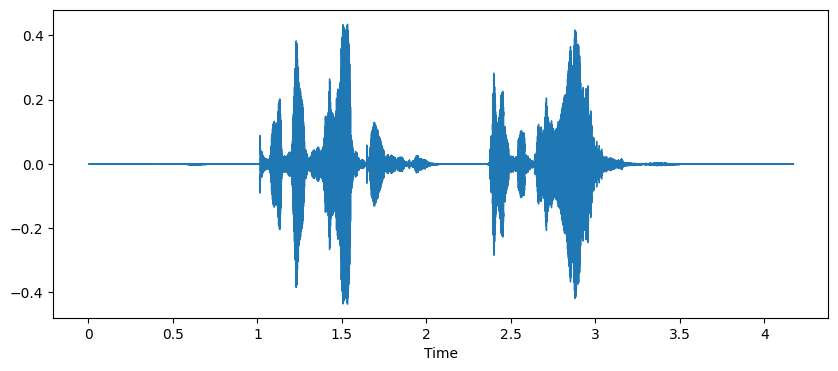

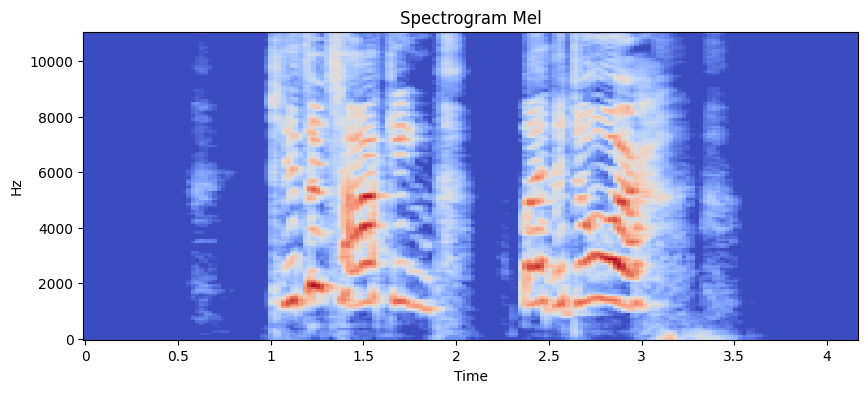

In [86]:
import IPython.display as pythnDisplay
import matplotlib.pyplot as plt


import librosa.display



sampleFilePath = mergedDataSet.FilePath.iloc[0]
print("Selected file emotion",mergedDataSet.Emotions.iloc[0])
print("Selected audio file",sampleFilePath);

fileData,spectogram = librosa.load(sampleFilePath)

plt.figure(figsize=(10, 4))
librosa.display.waveshow(y=fileData, sr=spectogram)
plt.figure(figsize=(10, 4))

spectrogram = librosa.feature.melspectrogram(y=fileData, sr=spectogram, n_mels=128,fmax=8000) 
spectrogramLogs = librosa.power_to_db(spectrogram)
librosa.display.specshow(spectrogramLogs,x_axis='time', y_axis='hz' );
plt.title('Spectrogram Mel')

pythnDisplay.Audio(fileData,rate=spectogram)


<h3>Data Augmentation</h3>

<p>The technique of introducing tiny perturbations to our initial training set to generate fresh synthetic data samples is known as data augmentation.</p>
<p>We use noise injection, time shifting, pitch and speed changes, and other techniques to provided audio data inorder to increase the audio samples that can be used to train and validate the data.</p>
<p>We are using librosa library for adding pitch and stretch to the given audio samples</p>


In [87]:
import  numpy as np

def addNoiseFn(audioData):
    amplitudeNoise = 0.035*np.random.uniform()*np.amax(audioData)
    audioData = audioData + amplitudeNoise*np.random.normal(size=audioData.shape[0])
    return audioData

In [88]:
def addStretchFn(audioData, rate=0.8):
    return librosa.effects.time_stretch(audioData,rate=0.8)

In [89]:
def addPitchFn(audioData, rateSampling, factorPitch=0.7):
    return librosa.effects.pitch_shift(audioData, sr=rateSampling, n_steps=factorPitch)

<h3>Feature Extraction</h3>
<p>As we are reading the audio files we can't directly give the files to train or validate the model So, we have to manipulate the data in the form of model recognizable format</p>
<p>So, we have to do the feature extraction using the librosa library</p>
<p>The audio signal is in the form of amplitude, frequency and time </p>
<p>We are extracting using <a href="https://librosa.org/doc/main/feature.html">https://librosa.org/doc/main/feature.html </a></p>
<p>Utilizing Librosa, we extract audio features such as Chroma_stft, Zero Crossing Rate, MFCC, RMS (Root Mean Square) value, and Mel Spectrogram to train our model for audio analysis</p>
<ul>
    <li>Mel Spectrogram -  It provides the frequency content representation, used as an input in the models </li>
    <li>RMS Value used to measures the audio signal magnitude</li>
    <li>MFCC(Mel-frequency cepstral coefficients) - it presents the power spectrum data based on human ear sensitivity</li>
    <li>Zero Crossing Rate used for measuring the rate of sign change</li>
    <li>Chroma_stft it used to capture the pitch distribution</li>
</ul>

In [90]:
def featExtraction(audioFeatData,rateSample):
    # Zero Crossing Rate
    outputResultArr = np.array([])
    crossingRate = np.mean(librosa.feature.zero_crossing_rate(y=audioFeatData).T, axis=0)
    outputResultArr=np.hstack((outputResultArr, crossingRate))
    # Chroma_stft - deviation
    deviation = np.abs(librosa.stft(audioFeatData))
    stftChroma = np.mean(librosa.feature.chroma_stft(S=deviation, sr=rateSample).T, axis=0)
    outputResultArr = np.hstack((outputResultArr, stftChroma))
    # mel frequency
    melFreq = np.mean(librosa.feature.mfcc(y=audioFeatData, sr=rateSample).T, axis=0)
    outputResultArr = np.hstack((outputResultArr, melFreq))
    # RMS
    meanSquare = np.mean(librosa.feature.rms(y=audioFeatData).T, axis=0)
    outputResultArr = np.hstack((outputResultArr, meanSquare))
    # MelSpectogram
    specMelVal = np.mean(librosa.feature.melspectrogram(y=audioFeatData, sr=rateSample).T, axis=0)
    outputResultArr = np.hstack((outputResultArr, specMelVal)) # stacking horizontally
    
    return outputResultArr

In [91]:
def applyFeaturesToAudio(audioPath,isOnlyFeature):
    audioData,rateSample=librosa.load(audioPath,offset=0.6, duration=2.5)
    if isOnlyFeature:
        extractedFeature = featExtraction(audioData,rateSample)
        finalAudioData = np.array([extractedFeature])
        return finalAudioData
    else:
        extractedFeature = featExtraction(audioData,rateSample)
        finalAudioData = np.array(extractedFeature)

        dataAfterNoiseAdded = addNoiseFn(audioData)
        extractedNoiseData = featExtraction(dataAfterNoiseAdded, rateSample)
        finalAudioData = np.vstack((finalAudioData, extractedNoiseData))

        dataStretch = addStretchFn(audioData)
        extractedStretchData = featExtraction(dataStretch, rateSample)
        finalAudioData = np.vstack((finalAudioData, extractedStretchData))
        
        pitchedDataStretch = addPitchFn(audioData,rateSample)
        extractedFinalData = featExtraction(pitchedDataStretch, rateSample)
        finalAudioData = np.vstack((finalAudioData, extractedFinalData))

        return finalAudioData
        
        

In [94]:
finalXVal, finalYVal = [],[]
print(mergedDataSet.FilePath.shape)
for filePath, reqEmotion, reqIndex in zip(mergedDataSet.FilePath, mergedDataSet.Emotions,range(mergedDataSet.FilePath.shape[0])):
    reqFeatures = applyFeaturesToAudio(filePath,False)
    for featData in reqFeatures:
        finalXVal.append(featData)
        finalYVal.append(reqEmotion)
    if reqIndex % 600 == 0:
        print("Total Number of audios features extracted: ", reqIndex)
        
print("Completed feature extraction")

(12162,)
Total Number of audios features extracted:  0
Total Number of audios features extracted:  600
Total Number of audios features extracted:  1200
Total Number of audios features extracted:  1800
Total Number of audios features extracted:  2400
Total Number of audios features extracted:  3000
Total Number of audios features extracted:  3600
Total Number of audios features extracted:  4200
Total Number of audios features extracted:  4800
Total Number of audios features extracted:  5400
Total Number of audios features extracted:  6000
Total Number of audios features extracted:  6600
Total Number of audios features extracted:  7200
Total Number of audios features extracted:  7800
Total Number of audios features extracted:  8400
Total Number of audios features extracted:  9000
Total Number of audios features extracted:  9600
Total Number of audios features extracted:  10200
Total Number of audios features extracted:  10800
Total Number of audios features extracted:  11400
Total Number

In [95]:
len(finalXVal), len(finalYVal),mergedDataSet.FilePath.shape

(48648, 48648, (12162,))

In [96]:
len(testXVal), len(testYVal),mergedDataSet.FilePath.shape

(0, 0, (12162,))